# Introduction to Data Science

## Notebook 3 (linear and polynomial regression, gradient method)

### Linear regression

In [38]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

We'll use Sklearn's california housing dataset from the 1990 US census. First load the dataset from sklearn, and notice that it is a dictionary like object. 

In [39]:
from sklearn.datasets import fetch_california_housing

cali = fetch_california_housing()
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [40]:
cali.data.shape

(20640, 8)

In [41]:
print(cali.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [42]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Let's take a look at the data!

In [43]:
ca = pd.DataFrame(cali.data)
ca.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Adding column names

In [44]:
ca.columns = cali.feature_names
ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<span style="color:red;font-size:20px">Add a feature called "RoomRatio" which is rooms per bedroom in the house.</span>

In [45]:
ca['RoomRatio'] = ca.AveRooms/ca.AveBedrms

In [46]:
ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomRatio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,6.821705
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,6.418626
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,7.721053
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,5.421277
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,5.810714


Take a look at the target variable and add it to our data frame!

In [47]:
print(cali.target.shape)

(20640,)


In [48]:
ca['PRICE'] = cali.target

#### Some descriptive statistics - explanatory data analysis

In [49]:
ca.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomRatio,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,4.984262,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.171836,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,1.000000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,4.169542,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,4.921728,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,5.700424,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,10.000000,5.000010


##### Scatter plots

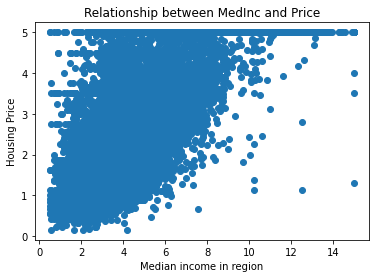

In [50]:
plt.scatter(ca.MedInc, ca.PRICE)
plt.xlabel("Median income in region")
plt.ylabel("Housing Price")
plt.title("Relationship between MedInc and Price")
plt.show()

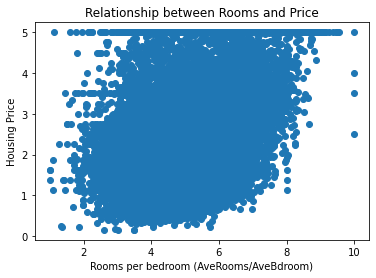

In [51]:
plt.scatter(ca.RoomRatio, ca.PRICE)
plt.xlabel("Rooms per bedroom (AveRooms/AveBdroom)")
plt.ylabel("Housing Price")
plt.title("Relationship between Rooms and Price")
plt.show()

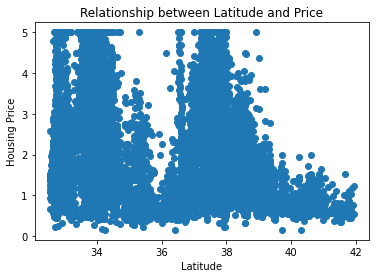

In [52]:
plt.scatter(ca.Latitude, ca.PRICE)
plt.xlabel("Latitude")
plt.ylabel("Housing Price")
plt.title("Relationship between Latitude and Price")
plt.show()

##### Histograms

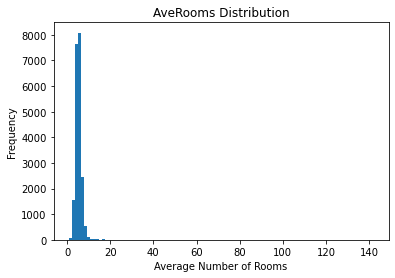

In [53]:
plt.hist(ca.AveRooms,bins=100)
plt.title("AveRooms Distribution")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Frequency")
plt.show()

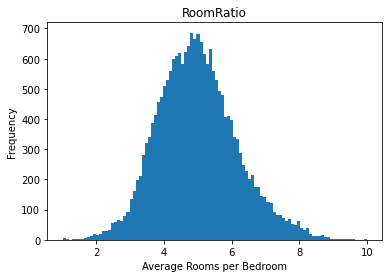

In [54]:
plt.hist(ca.RoomRatio,bins=100)
plt.title("RoomRatio")
plt.xlabel("Average Rooms per Bedroom")
plt.ylabel("Frequency")
plt.show()

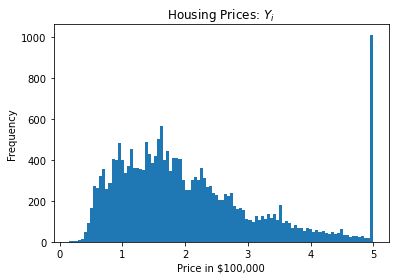

In [55]:
plt.hist(ca.PRICE,bins=100)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price in $100,000')
plt.ylabel('Frequency')
plt.show()

#### Fitting linear regression

In [56]:
from sklearn.linear_model import LinearRegression

X = ca.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

###### What can we do with a LinearRegression object? 
Y = mx + b

In [57]:
# Look inside linear regression object
# lm.<tab>
''' lm. '''

' lm. '

In [58]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, ca.PRICE)

LinearRegression()

In [59]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -34.27680088156909


<span style="color:red;font-size:20px">How many coefficients do you expect the model to have?</span>

In [60]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 9


In [61]:
# The coefficients
pd.DataFrame({'featues':X.columns, 'estimatedCoefficients':lm.coef_})

,featues,estimatedCoefficients
0,MedInc,0.474204
1,HouseAge,0.009306
2,AveRooms,0.108618
3,AveBedrms,-0.359542
4,Population,-0.000008
5,AveOccup,-0.003991
6,Latitude,-0.400516
7,Longitude,-0.416902
8,RoomRatio,-0.302304


In [62]:
# first five predicted prices
lm.predict(X)[0:5]

array([4.15465528, 4.00664182, 3.61646798, 3.28267399, 2.3618279 ])

Text(0, 0.5, 'Frequency')

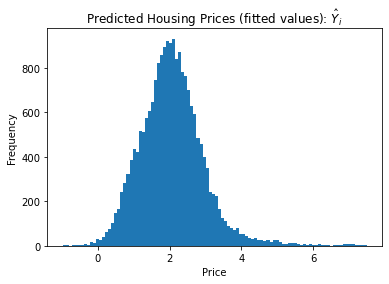

In [63]:
plt.hist(lm.predict(X),bins=100)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

##### Predicted and actual values

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

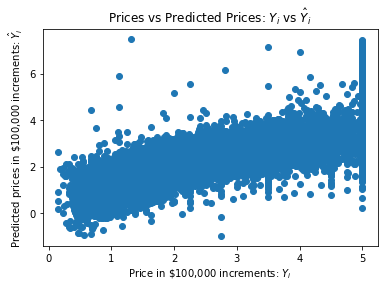

In [64]:
plt.scatter(ca.PRICE, lm.predict(X))
plt.xlabel("Price in \$100,000 increments: $Y_i$")
plt.ylabel("Predicted prices in \$100,000 increments: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

<span style="color:red;font-size:20px"> How can we tell if our model fits the data well?</span>

##### Sum Squared Error (SSE), Mean Squared Error (MSE)
It is not as straight forward to interpret linear regression models (no ROC curve). If possible, we can compare our RSS and MSE results to a state of the art model. We can also compare them to a baseline model.

In [65]:
sse = np.sum((ca.PRICE - lm.predict(X)) ** 2)
sse

10619.873849003992

In [66]:
mse = np.mean((ca.PRICE - lm.predict(X)) ** 2)
mse

0.5145287717540692

#### Using only one explanatory variable

In [67]:
lm = LinearRegression()
lm.fit(X[['MedInc']], ca.PRICE)

LinearRegression()

In [68]:
mse_MedInc = np.mean((ca.PRICE - lm.predict(X[['MedInc']])) ** 2)
mse_MedInc

0.7011311502929489

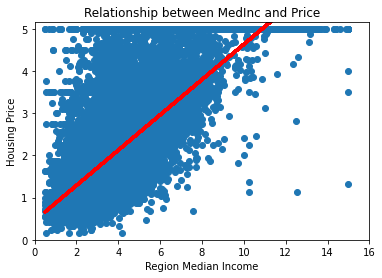

In [69]:
plt.scatter(ca.MedInc, ca.PRICE)
plt.xlabel("Region Median Income")
plt.ylabel("Housing Price")
plt.title("Relationship between MedInc and Price")

plt.plot(ca.MedInc, lm.predict(X[['MedInc']]), color='red', linewidth=3)
plt.axis( [0, 16, 0, 5.15] )
plt.show()

#### Training and test set
Why use a linear model? Sometimes the purpose is to see how well a linear model fits the data. The coefficients may tell us something about the importance of our features, whether there's a positive or negative relationship. Other times we build the model for prediction, in which case we'll use train-test split as we did in classification models.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, ca.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13828, 9)
(6812, 9)
(13828,)
(6812,)


In [71]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

##### Calculating the error

In [72]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.509650253119637
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.5251513666367176


### Gradient method on a small example

#### What is a linear regression model? Think: Y = mx + b

 $\hat{Y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \dots + w_n \cdot x_n$ 
 
This can also be written as $\hat{y}$ = w<sup>T</sup>x, where w is a vector of weights (or coefficients) and x is a nXd matrix of features. There are n records in the dataset and d features.

<div>
<img src="https://media.licdn.com/dms/image/D4D22AQGLrAWFrtpZwQ/feedshare-shrink_800/0/1681765115487?e=1684368000&v=beta&t=ZNKVKNPZW8ECKgBt2lAoOUta8Mn6iHVy9Bnh5xY5HGM" width="200"/>
</div>

#### Data
The area of some flat ($m^2$) and their prices (million HUF):

In [73]:
size = [26, 33, 49, 53, 120, 150]
price = [9.8, 7.3, 14, 15, 45, 40]

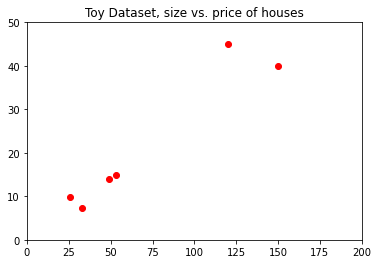

In [74]:
plt.plot(size, price, 'ro')
plt.axis( [0, 200, 0, 50] )
plt.title("Toy Dataset, size vs. price of houses")
plt.show()

#### Fitting a linear model

First we define a function that calculates the sum of squared errors for a given $\hat{Y} = w_1 \cdot x_1$ model. We assume that the data is given so the error only depends on $w$.

In [75]:
def err(w):
    return np.sum(np.power(np.add(np.multiply(w,size), np.multiply(-1, price)),2))

We consider some simple linear models then we calculate their errors

* Model 1 (blue): price = 0.3 * size
* Model 2 (green): price = 0.4 * size
* Model 3 (red): price = 0.5 * size

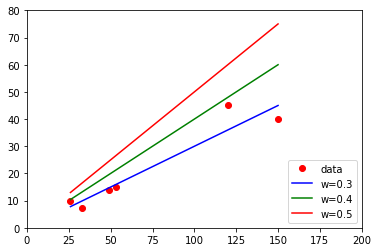

In [76]:
plt.plot(size, price, 'ro')
plt.plot(size, np.multiply(0.3,size), 'b-')
plt.plot(size, np.multiply(0.4,size), 'g-')
plt.plot(size, np.multiply(0.5,size), 'r-')
plt.legend(["data","w=0.3","w=0.4","w=0.5"], loc="lower right")
plt.axis( [0, 200, 0, 80] )
plt.show()

In [77]:
err(0.3)

118.06

In [78]:
err(0.4)

513.97

In [79]:
err(0.5)

1787.38

Let's plot the sum of squared errors against $w$!

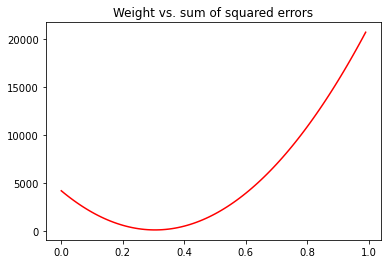

In [80]:
weights = np.multiply(range(100), 0.01)
errors  = []

for w in weights:
    errors.append(err(w))
    
plt.plot(weights, errors, 'r-')
plt.title("Weight vs. sum of squared errors")
plt.show()

We are looking for the w with smallest error. We'll apply the gradient method to find this:
- $epsilon$ is the learning rate. <span style="color:red">What happens when we change the learning rate?</span>
- $w$ is the coefficient; we randomly assign an initial value for w; w is updated in each iteration
- $e$ is the error (predicted label - actual label), in this case sum squared error

In [81]:
eps = 1e-8  
w   = 0.9      
e   = []       
for iteration in range(10000):
    w = w - eps * ( 2*np.sum( np.multiply(np.multiply(size,size),w)) - 2*np.sum(np.multiply(size,price)) )
    e.append(err(w))

In [82]:
w

0.30497367247536933

<span style="color:red;font-size:20px">How the error changes with number of iterations?</span>

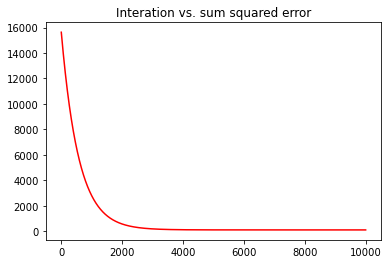

In [83]:
plt.plot(range(10000), e, 'r-')
plt.title("Interation vs. sum squared error")
plt.show()

#### Visualizing the model

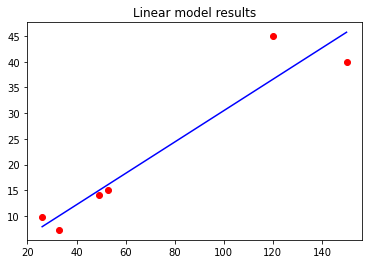

In [84]:
plt.plot(size, price, 'ro')
plt.plot(size, np.multiply(w,size), 'b-')
plt.title("Linear model results")
plt.show()

#### Polynomial regression

As an example we will fit a polynomial of degree 6, namely we will fit the following model:

 $\hat{Y} = w_0 + w_1 \cdot x + w_2 \cdot x^2 + \dots + w_6 \cdot x^6$
 
We normalize the data. We create a data frame that contains the polynomial attrributes. <span style="color:red">Why do we need a column of 1s?</span>

In [85]:
import math

size1 = np.multiply(np.add(size,-np.mean(size)), 1/math.sqrt(np.var(size)) )

size2 = np.multiply(size1,size1)
size3 = np.multiply(size2,size1)
size4 = np.multiply(size3,size1)
size5 = np.multiply(size4,size1)
size6 = np.multiply(size5,size1)

data = np.column_stack( (np.ones(6), size1, size2, size3, size4, size5, size6) )

In [86]:
def err(w):
    e0 = np.dot(data,w)-price
    return sum(np.multiply(e0, e0))

In [87]:
eps = 1e-5
w = [0,0,0,0,0,0,0]
e = []

for iteration in range(100000):
    grad=[]
    for k in range(len(w)):
        grad.append(np.sum(np.multiply((np.dot(data,w)-price),data[:,k])))
    for k in range(len(w)):
        w[k] = w[k] - eps * grad[k]
        
    if iteration % 1000 == 0:  #Just to see what happens and to be able to plot the SSE as function of the iterations
        e0 = err(w)
        e.append(e0)
        print(str(e0))

4164.098764310749
2062.8442686265234
1871.46322192925
1702.293912999091
1552.1316869467626
1418.3086751254334
1298.5966834524784
1191.1283357886914
1094.33289486139
1006.883987778075
927.6569900924688
855.6942489544485
790.1766712256043
730.4004820518353
675.7581857818864
625.7229444453183
579.8357374618888
537.6947864887883
498.94682669847117
463.27988466943816
430.41728698692464
400.1126754408851
372.1458466823008
346.3192682233456
322.455150254298
300.39297512417215
279.9874044833535
261.1064988175226
243.63019606171653
227.4490056976351
212.46288263160528
198.58025156989413
185.71715783119288
173.79652478935893
162.74750160579723
152.50488773865803
143.0086230253022
134.20333402279653
126.03792883729002
118.46523394099043
111.44166751703735
104.92694472976827
98.88381102493355
93.2778001489405
88.077014060705
83.2519223123884
78.77517881107093
74.62145415425029
70.7672819678307
67.19091787393585
63.87220988395063
60.79247915498163
57.9344101697602
55.28194950444938
52.8202124387065

#####  Visualizing the model

In [88]:
# for any (normalized) house size, what price would this model predict?

x = np.add(np.multiply(range(400),0.01),-2)

In [89]:
def predict(size):
    return np.dot(w, (1,size,size**2,size**3,size**4,size**5,size**6))

In [90]:
predictions = []
for i in x:
    predictions = predictions + [predict(i)]

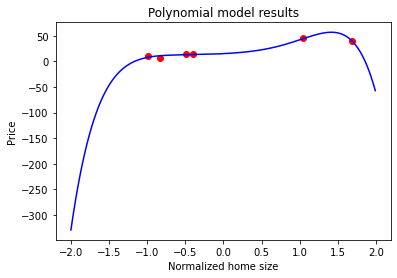

In [91]:
plt.plot(size1,price,'ro')
plt.plot(x,predictions,'b-')
plt.title("Polynomial model results")
plt.xlabel("Normalized home size")
plt.ylabel("Price")
plt.show()

How the error changes with the number of iterations? (One unit corresponds to 1000 iterations on the $x$ axis.)

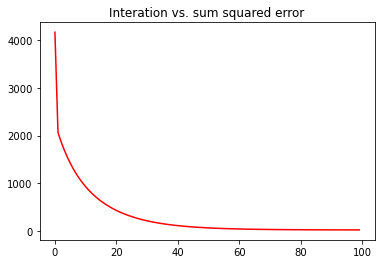

In [92]:
plt.plot(range(100), e, 'r-')
plt.title("Interation vs. sum squared error")
plt.show()